
# DESC SN Ia metric # 



In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import healpy as hp
import pandas as pd

import rubin_sim.maf as maf
from rubin_sim.data import get_baseline
import time

In [2]:
# Baseline Survey
baseline_file = get_baseline()
runName = os.path.split(baseline_file)[-1].replace('.db', '')

print(runName)

baseline_v2.1_10yrs


In [3]:
# Set up output
outDir = 'sn'
resultsDb = maf.db.ResultsDb(outDir=outDir)

In [4]:
plotDict = {'percentileClip': 95., 'nTicks': 5}

sne_nside = 8
sn_summary = [maf.MedianMetric(), maf.MeanMetric(),
              maf.SumMetric(metricName='Total detected')]
slicer = maf.HealpixSlicer(nside=sne_nside, useCache=False)
#slicer = maf.HealpixSubsetSlicer(nside=16, hpid=[890], useCache=False)
#slicer = maf.HealpixSubsetSlicer(nside=16, hpid=[889], useCache=False)

metric = maf.SNNSNMetric(verbose=False)  
bundle = maf.MetricBundle(metric, slicer, None, plotDict=plotDict,  
                        summaryMetrics=sn_summary)

bg = maf.MetricBundleGroup({'sn': bundle}, baseline_file, outDir, resultsDb)

Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 g 20774 799 26
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 i 78302 799 98
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 r 50337 799 63
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 y 62322 799 78
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 z 72709 799 91
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_0.0_0.0_380.0_800.0_ebvofMW_0.0_vstack.hdf5 g 20774 799 26
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_0.0_0.0_380.0_800.0_ebvofMW_0.0_vstack.hdf5 i 78302 799 98
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_0.0_0.0_380.0_800.0_ebvofMW_0.0_vstack.hdf5 r 50337 799 63
Loading 

Querying table None with no constraint for columns ['visitExposureTime', 'filter', 'fieldRA', 'rotSkyPos', 'fiveSigmaDepth', 'observationStartMJD', 'numExposures', 'fieldDec', 'observationId', 'night', 'visitTime'].
Found 2081749 visits
Running:  ['sn']


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/maps/dustMap.py:42: UserWarning: Slicer value of nside 8 different from map value 128, using slicer value
  warnings.warn(


Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "" constraint now.


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/plots/plotHandler.py:584: UserWarning: Cannot plot object metric values with this plotter.
  warnings.warn(


Plotting complete.
runtime= 4816.591997861862 s


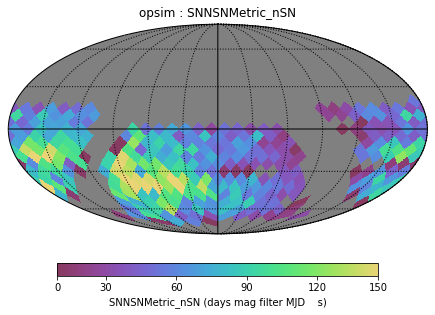

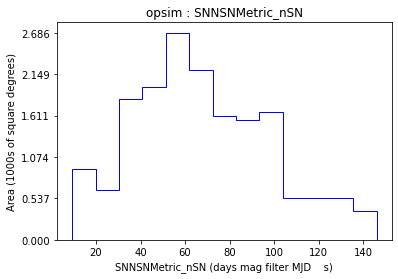

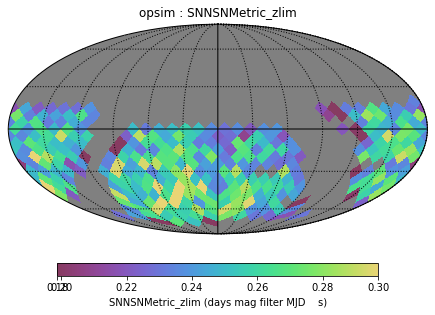

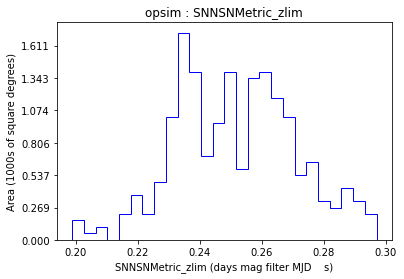

In [5]:
t1 = time.time()
bg.runAll()     
t2 = time.time()
bg.plotAll(closefigs=False)
print('runtime=', t2-t1, 's')

In [6]:
bundle.metricValues.compressed()

array([rec.array([(52.848493, 0.233552)],
                 dtype=[('nSN', '<f8'), ('zlim', '<f8')]),
       rec.array([(60.71431, 0.2380435)],
                 dtype=[('nSN', '<f8'), ('zlim', '<f8')]),
       rec.array([(48.316362, 0.228149)],
                 dtype=[('nSN', '<f8'), ('zlim', '<f8')]),
       rec.array([(40.682279, 0.229423)],
                 dtype=[('nSN', '<f8'), ('zlim', '<f8')]),
       rec.array([(68.247861, 0.226359)],
                 dtype=[('nSN', '<f8'), ('zlim', '<f8')]),
       rec.array([(35.660331, 0.2213645)],
                 dtype=[('nSN', '<f8'), ('zlim', '<f8')]),
       rec.array([(54.450947, 0.24374)],
                 dtype=[('nSN', '<f8'), ('zlim', '<f8')]),
       rec.array([(38.925058, 0.216149)],
                 dtype=[('nSN', '<f8'), ('zlim', '<f8')]),
       rec.array([(36.091849, 0.230338)],
                 dtype=[('nSN', '<f8'), ('zlim', '<f8')]),
       rec.array([(53.813277, 0.236247)],
                 dtype=[('nSN', '<f8'), ('zlim', 

In [7]:
# The 'reduce' values of the metric got stored in the bundle dict in the bungle group 
bg.bundleDict

{'sn': <rubin_sim.maf.metricBundles.metricBundle.MetricBundle at 0x10a62f550>,
 'SNNSNMetric_nSN': <rubin_sim.maf.metricBundles.metricBundle.MetricBundle at 0x141bef550>,
 'SNNSNMetric_zlim': <rubin_sim.maf.metricBundles.metricBundle.MetricBundle at 0x15601d600>}

In [8]:
# The nSN and zlim values are pulled out in those reduce methods, into their own bundles.
bdict = bg.bundleDict
print(bdict['SNNSNMetric_nSN'].metricValues.compressed())
np.median(bdict['SNNSNMetric_nSN'].metricValues.compressed())

[ 52.848493  60.71431   48.316362  40.682279  68.247861  35.660331
  54.450947  38.925058  36.091849  53.813277  41.189964  61.111932
  52.652236  31.031576  18.712253  25.016557  67.657189  62.742202
  72.390153  64.343326  87.641302  56.349018  95.460021  76.361455
  94.451322  46.923074  63.257501  60.559702  42.732418  24.578352
  25.047082  51.814501  55.624445  69.923795  70.773167  70.17664
  46.979536  50.09025   40.330336  52.874128  35.461473  35.051077
   4.683663  28.390597  43.831746  65.742976  72.914266  56.333582
  51.28279   93.550348  72.149546  77.245092  71.35431   84.267462
  55.596246  67.780756  51.882888  64.863321  36.975651  34.076657
  39.676479  17.833532   8.826034  32.930843  40.759065  31.562709
  46.030839  51.445772  59.304073  84.565053  60.611565  40.696849
  79.351964  81.608987 108.620203  59.631868  76.062702  78.825609
  94.689417  72.439339  92.289659  68.295233  49.828319  42.350036
  47.983887  42.371462  41.395473  13.813751  18.99529   41.903

64.606933

In [9]:
bdict['SNNSNMetric_zlim'].metricValues.compressed()

array([0.233552 , 0.2380435, 0.228149 , 0.229423 , 0.226359 , 0.2213645,
       0.24374  , 0.216149 , 0.230338 , 0.236247 , 0.244433 , 0.267618 ,
       0.232698 , 0.232198 , 0.19263  , 0.217505 , 0.2345605, 0.266218 ,
       0.250634 , 0.2428825, 0.247092 , 0.233247 , 0.2759315, 0.281417 ,
       0.255984 , 0.236574 , 0.274332 , 0.2831565, 0.250446 , 0.19884  ,
       0.209324 , 0.2345255, 0.245366 , 0.234073 , 0.2316545, 0.26761  ,
       0.258329 , 0.2347925, 0.2451365, 0.26509  , 0.246603 , 0.260773 ,
       0.233419 , 0.2367425, 0.251423 , 0.256978 , 0.25087  , 0.246058 ,
       0.2317555, 0.249976 , 0.238505 , 0.267137 , 0.24981  , 0.2663115,
       0.2393055, 0.262596 , 0.249691 , 0.2761305, 0.235286 , 0.248315 ,
       0.260156 , 0.2002255, 0.219313 , 0.239272 , 0.237796 , 0.2207   ,
       0.2367485, 0.22896  , 0.2228095, 0.236255 , 0.255806 , 0.2753995,
       0.2445965, 0.26815  , 0.288546 , 0.222725 , 0.258165 , 0.256683 ,
       0.2908815, 0.262692 , 0.25094  , 0.235262 , 